In [1]:
import cv2
import numpy as np

def preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    image = cv2.imread(image_path)
    # Resize the image
    image = cv2.resize(image, target_size)
    # Normalize the image (if needed)
    image = image / 255.0
    return image

In [2]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Model

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet')
# Remove the last layer (classification layer) to get feature vectors
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

def extract_features(image):
    # Expand dimensions to match the model's input shape
    image = np.expand_dims(image, axis=0)
    # Preprocess the image for VGG16
    image = preprocess_input(image)
    # Extract features
    features = model.predict(image)
    # Flatten the features to a 1D array
    features = features.flatten()
    return features

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [14]:
import kagglehub

path = kagglehub.dataset_download("bhaskar2443053/fashion-small")

path += '/fashion_small/resized_images'

In [23]:
import os

image_dir = path
feature_db = {}

# Only the first hundred images will be used
first_hundred = os.listdir(image_dir)[:100]

for image_name in first_hundred:
    image_path = os.path.join(image_dir, image_name)
    image = preprocess_image(image_path)
    features = extract_features(image)
    feature_db[image_name] = features

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 632ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 603ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 932ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 701ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 657ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 642ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 643ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 608ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 662ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 671ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 649ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/

In [24]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_images(query_image_path, feature_db, top_n=5):
    # Preprocess and extract features from the query image
    query_image = preprocess_image(query_image_path)
    query_features = extract_features(query_image)

    # Calculate similarity scores
    similarities = {}
    for image_name, features in feature_db.items():
        sim = cosine_similarity([query_features], [features])[0][0]
        similarities[image_name] = sim

    # Sort by similarity and get the top N results
    sorted_similarities = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_similarities[:top_n]

In [25]:
query_image_path = '/content/white_tshirt.jpg'
similar_images = find_similar_images(query_image_path, feature_db, top_n=5)

print("Top similar images:")
for image_name, similarity in similar_images:
    print(f"{image_name}: {similarity:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step
Top similar images:
53914.jpg: 1.0000
58606.jpg: 1.0000
31167.jpg: 1.0000
21933.jpg: 1.0000
45196.jpg: 1.0000


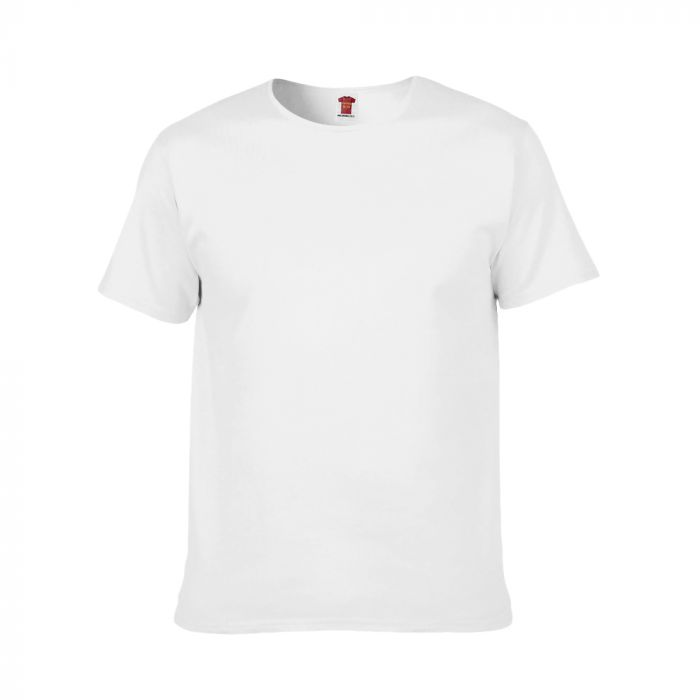

In [26]:
from PIL import Image
from IPython.display import display

img = Image.open('/content/white_tshirt.jpg')
display(img)

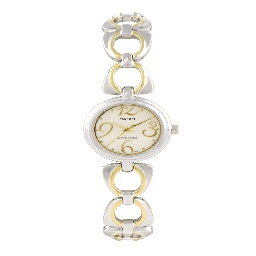

In [34]:
# This is the most accurate result from the first 100 images from the dataset

img = Image.open( path + '/45196.jpg')
display(img)